In [216]:
import numpy as np
import cv2
import scipy.io as sio
import tqdm

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [31]:
lm_src=sio.loadmat('CV_01_C4W1L01_000003_to_000045_hindi_abhishek_generated_lip_landmarks.mat')['y_pred']
lm_dst=sio.loadmat('CV_01_C4W1L01_000003_to_000045_generated_lip_landmarks_original.mat')['y_pred']

In [32]:
num_frames,num_lm,dim_lm=lm_src.shape
lm_src_flat=np.reshape(lm_src,[num_frames,num_lm*dim_lm])

num_frames,num_lm,dim_lm=lm_dst.shape
lm_dst_flat=np.reshape(lm_dst,[num_frames,num_lm*dim_lm])




# lm_src=lm_src.flatten('C')

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [33]:
print(lm_src_flat.shape)
print(lm_dst_flat.shape)


(1102, 40)
(1128, 40)


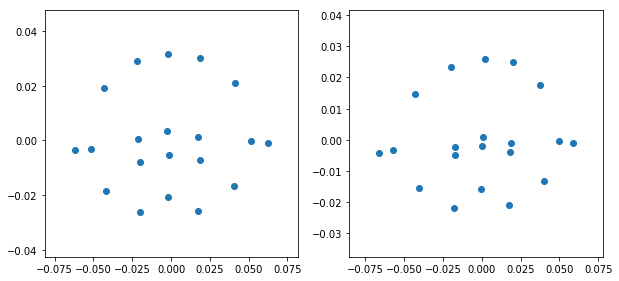

In [74]:
from sklearn.neighbors import NearestNeighbors
samples = lm_dst_flat
neigh = NearestNeighbors(2, 0.4)
neigh.fit(samples)

a0=188
aa=neigh.kneighbors([lm_src_flat[a0]], 5, return_distance=False)
# aa.shape



plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.scatter(lm_src[a0][:,0],lm_src[a0][:,1])

plt.subplot(222)
plt.scatter(lm_dst[aa[0,0]][:,0],lm_src[aa[0,0]][:,1])

# plt.subplot(223)
# plt.scatter(lm_dst[aa[0,1]][:,0],lm_src[aa[0,1]][:,1])

# plt.subplot(224)
# plt.scatter(lm_dst[aa[0,2]][:,0],lm_src[aa[0,2]][:,1])


In [143]:
lm_center_src = lm_src[:,[14,16]]
lower_lm_src = lm_center_src[:,1,0]
lower_lm_src = (lower_lm_src-lower_lm_src.min())/(lower_lm_src.max()-lower_lm_src.min())

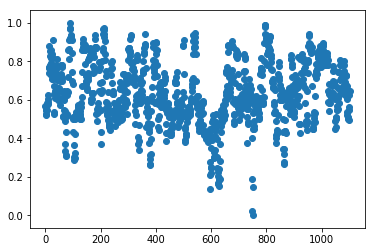

In [144]:
plt.scatter(range(0,len(lower_lm_src)),lower_lm_src)

In [145]:
lm_center_dst = lm_dst[:,[14,16]]
lower_lm_dst = lm_center_dst[:,1,0]
lower_lm_dst = (lower_lm_dst-lower_lm_dst.min())/(lower_lm_dst.max()-lower_lm_dst.min())

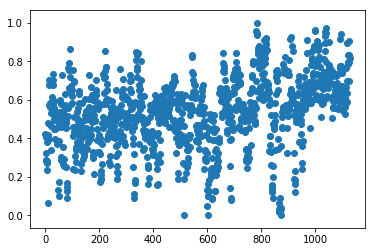

In [146]:
plt.scatter(range(0,len(lower_lm_dst)),lower_lm_dst)

In [154]:
k_centers=np.array([0.0,0.2,0.4,0.6,0.8,1.0]).astype('float')

In [159]:
k_centers

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [169]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(1)
neigh.fit(np.expand_dims(lower_lm_dst,1))
dst_centroids=neigh.kneighbors(np.expand_dims(k_centers,1), 1, return_distance=False)

In [207]:
# 25 fps to 30 fps
dst_centroids=np.round(dst_centroids.astype('float')*30/25).astype('int')

In [208]:
neigh = NearestNeighbors(1)
neigh.fit(np.expand_dims(k_centers,1))
src_assignment=neigh.kneighbors(np.expand_dims(lower_lm_src,1), 1, return_distance=False)

In [250]:
dst_frame_ids_for_source=dst_centroids[src_assignment].squeeze()
print(len(dst_frame_ids_for_source))
print(len(dst_frame_ids_for_source))
# delay of 5 frames or 200 ms:
temp=[]
for i in range(0,5):
    temp.append(dst_frame_ids_for_source[0])
dst_frame_ids_for_source=np.array(temp+dst_frame_ids_for_source.tolist())
print(len(dst_frame_ids_for_source),dst_frame_ids_for_source.shape)


1102
1102
1107 (1107,)


In [251]:
dst_frame_ids_for_source.tolist()

[409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 784,
 768,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 768,
 768,
 768,
 768,
 768,
 768,
 409,
 409,
 409,
 409,
 768,
 768,
 409,
 409,
 409,
 409,
 409,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 390,
 390,
 390,
 390,
 390,
 390,
 409,
 409,
 409,
 409,
 409,
 768,
 768,
 768,
 768,
 768,
 784,
 784,
 784,
 784,
 784,
 784,
 784,
 784,
 784,
 768,
 768,
 409,
 409,
 409,
 390,
 390,
 390,
 390,
 613,
 613,
 390,
 390,
 390,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 409,
 390,
 409,
 409,
 409,
 409,
 409,
 768,
 768,
 768,
 768,
 784,
 768,
 768,
 768,
 768,
 409,
 768,
 768,
 768,
 409,
 768,
 768,
 409,
 409,
 409,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 768,
 768

In [252]:
def vid2img(filename):
    cap=cv2.VideoCapture(filename)
    success,frame=cap.read()
    allImg=[]
    while(success):
        allImg.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        success,frame=cap.read()
    return allImg

def allImg2vid(allImg, output_vid='output_body.mp4', frameRate=30):
    vidCodec = cv2.VideoWriter_fourcc(*'XVID')
    height, width, channel = allImg[0].shape
    vidFile = cv2.VideoWriter(output_vid, vidCodec, frameRate, (width, height))
    for i in tqdm.tqdm(range(0,len(allImg))):
        frame = cv2.cvtColor(allImg[i],cv2.COLOR_RGB2BGR)
        vidFile.write(frame)
    vidFile.release()
    print(" Successfully converted images in allImg to "+output_vid)
    return None



In [248]:
allImg_im1=vid2img('input_videos/CV_01_C4W1L01_000003_to_000045/CV_01_C4W1L01_000003_to_000045.mp4')
len(allImg_im1)

1260

In [253]:
allImg_im1[0].shape

(720, 1152, 3)

In [261]:
allImg_dst2src=[]
for i in dst_frame_ids_for_source:
    allImg_dst2src.append(allImg_im1[i])

In [262]:
len(allImg_dst2src)

1107

In [264]:
allImg2vid(allImg_dst2src,'output_with_jaw.mp4',frameRate=25)

100%|██████████| 1107/1107 [00:08<00:00, 134.38it/s]


 Successfully converted images in allImg to output_with_jaw.mp4


In [247]:
#!ffmpeg -y -i output_with_jaw.mp4 -vf "setpts=1.25*PTS" -r 30 output_with_jaw_seeing.mp4

In [265]:
!ffmpeg -i output_with_jaw.mp4 -i input_videos/CV_01_C4W1L01_000003_to_000045/CV_01_C4W1L01_000003_to_000045_hindi_abhishek_making.mp4 -c copy -map 0:v:0 -map 1:a:0 -shortest out_with_jaw_body.mp4

ffmpeg version 2.8.14-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.9) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --e

In [260]:
30*42

1260

In [220]:
1102*30/25

1322.4

In [266]:
allImg_im_temp=vid2img('out_with_jaw_body.mp4')


In [267]:
len(allImg_im_temp)

1107